In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

In [47]:
# grab the list of images that we'll be describing
imagePaths = list(paths.list_images("../data/dogs-vs-cats"))

In [48]:
def image_to_feature_vector(image, size=(64, 64)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [49]:
def extract_color_histogram(image, bins=(8, 8, 8)):
	# extract a 3D color histogram from the HSV color space using
	# the supplied number of `bins` per channel
	rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	hist = cv2.calcHist([rgb], [0, 1, 2], None, bins,
		[0, 180, 0, 256, 0, 256])
	cv2.normalize(hist, hist)
	# return the flattened histogram as the feature vector
	return hist.flatten()

In [50]:
def process_images(directory, has_labels=True):
    imagePaths = list(paths.list_images(directory))
    rawImages = []
    features = []
    labels = []

    for (i, imagePath) in enumerate(imagePaths):
        image = cv2.imread(imagePath)
        if image is None:
            print(f"Warning: Could not load image at {imagePath}")
            continue
        
        if has_labels:
            label = imagePath.split(os.path.sep)[-1].split(".")[0]
        else:
            label = None

        
        pixels = image_to_feature_vector(image)
        hist = extract_color_histogram(image)
        
        if i < 5:  # Print details for the first 5 images
            print(f"Image {i}:")
            print(f"  Path: {imagePath}")
            print(f"  Label: {label}")
            print(f"  Shape: {image.shape}")
            print(f"  Pixel vector shape: {pixels.shape}")
            print(f"  Histogram shape: {hist.shape}")
        
        rawImages.append(pixels)
        features.append(hist)
        labels.append(label)
        
        if i > 0 and i % 1000 == 0:
            print("[INFO] processed {}/{}".format(i, len(imagePaths)))

    return np.array(rawImages), np.array(features), np.array(labels)

In [55]:
# Process train and test data separately
print("[INFO] processing training data...")
rawImages, features, labels = process_images("../data/dogs-vs-cats/train")


[INFO] processing training data...
Image 0:
  Path: ../data/dogs-vs-cats/train/dog.8011.jpg
  Label: dog
  Shape: (500, 380, 3)
  Pixel vector shape: (12288,)
  Histogram shape: (512,)
Image 1:
  Path: ../data/dogs-vs-cats/train/cat.5077.jpg
  Label: cat
  Shape: (300, 399, 3)
  Pixel vector shape: (12288,)
  Histogram shape: (512,)
Image 2:
  Path: ../data/dogs-vs-cats/train/dog.7322.jpg
  Label: dog
  Shape: (120, 159, 3)
  Pixel vector shape: (12288,)
  Histogram shape: (512,)
Image 3:
  Path: ../data/dogs-vs-cats/train/cat.2718.jpg
  Label: cat
  Shape: (480, 467, 3)
  Pixel vector shape: (12288,)
  Histogram shape: (512,)
Image 4:
  Path: ../data/dogs-vs-cats/train/cat.10151.jpg
  Label: cat
  Shape: (375, 499, 3)
  Pixel vector shape: (12288,)
  Histogram shape: (512,)
[INFO] processed 1000/25000
[INFO] processed 2000/25000
[INFO] processed 3000/25000
[INFO] processed 4000/25000
[INFO] processed 5000/25000
[INFO] processed 6000/25000
[INFO] processed 7000/25000
[INFO] processed 8

In [66]:
(trainRI, testRI, trainRL, testRL) = train_test_split(
	rawImages, labels, test_size=0.25, random_state=42)
(trainFeat, testFeat, trainLabels, testLabels) = train_test_split(
	features, labels, test_size=0.25, random_state=42)

In [67]:
# train and evaluate a k-NN classifier on the raw pixel intensities
print("[INFO] evaluating raw pixel accuracy...")
modelRI = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
modelRI.fit(trainRI, trainRL)
accRI = modelRI.score(testRI, testRL)
print("[INFO] raw pixel accuracy: {:.2f}%".format(accRI * 100))

[INFO] evaluating raw pixel accuracy...
[INFO] raw pixel accuracy: 52.18%


In [68]:
# train and evaluate a k-NN classifier on the histogram representations
print("[INFO] evaluating histogram accuracy...")
modelFeat= KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
modelFeat.fit(trainFeat, trainLabels)
acc = modelFeat.score(testFeat, testLabels)
print("[INFO] histogram accuracy: {:.2f}%".format(acc * 100))

[INFO] evaluating histogram accuracy...
[INFO] histogram accuracy: 57.26%


In [ ]:
# # Make predictions on test set
# testPredictions = modelFeat.predict(testFeat)
# print("[INFO] Histogram predictions on test set:", testPredictions[:10])  # Print first 10 predictions

In [70]:
print("[INFO] processing test data...")
testRI, testFeat, testLabels = process_images("../data/dogs-vs-cats/test1", has_labels=False)

[INFO] processing test data...
Image 0:
  Path: ../data/dogs-vs-cats/test1/9733.jpg
  Label: None
  Shape: (375, 499, 3)
  Pixel vector shape: (12288,)
  Histogram shape: (512,)
Image 1:
  Path: ../data/dogs-vs-cats/test1/63.jpg
  Label: None
  Shape: (303, 200, 3)
  Pixel vector shape: (12288,)
  Histogram shape: (512,)
Image 2:
  Path: ../data/dogs-vs-cats/test1/6400.jpg
  Label: None
  Shape: (374, 500, 3)
  Pixel vector shape: (12288,)
  Histogram shape: (512,)
Image 3:
  Path: ../data/dogs-vs-cats/test1/823.jpg
  Label: None
  Shape: (374, 500, 3)
  Pixel vector shape: (12288,)
  Histogram shape: (512,)
Image 4:
  Path: ../data/dogs-vs-cats/test1/4217.jpg
  Label: None
  Shape: (250, 349, 3)
  Pixel vector shape: (12288,)
  Histogram shape: (512,)
[INFO] processed 1000/12500
[INFO] processed 2000/12500
[INFO] processed 3000/12500
[INFO] processed 4000/12500
[INFO] processed 5000/12500
[INFO] processed 6000/12500
[INFO] processed 7000/12500
[INFO] processed 8000/12500
[INFO] proces

In [71]:
# Make predictions on test set
testPredictionsRI = modelRI.predict(testRI)
testPredictionsFeat = modelFeat.predict(testFeat)

In [79]:
# Visualize predictions
import matplotlib.pyplot as plt

def visualize_predictions(imagePaths, predictionsRI, predictionsFeat, num_images=10):
    for i in range(min(num_images, len(imagePaths))):
        imagePath = imagePaths[i]
        image = cv2.imread(imagePath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title(f"Raw Pixel Prediction: {predictionsRI[i]}")
        
        plt.subplot(1, 2, 2)
        plt.imshow(image)
        plt.title(f"Histogram Prediction: {predictionsFeat[i]}")
        
        plt.show()

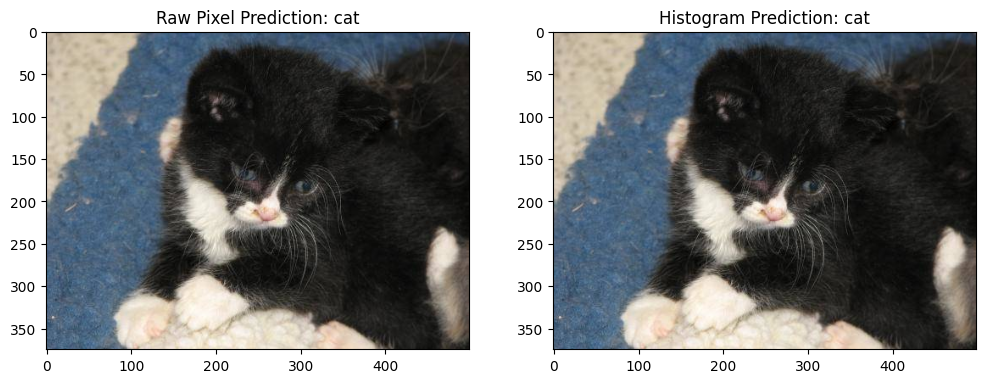

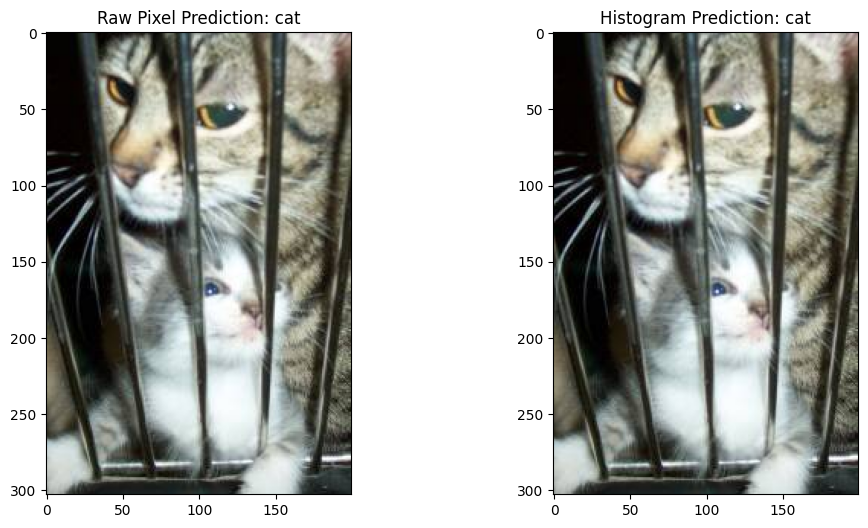

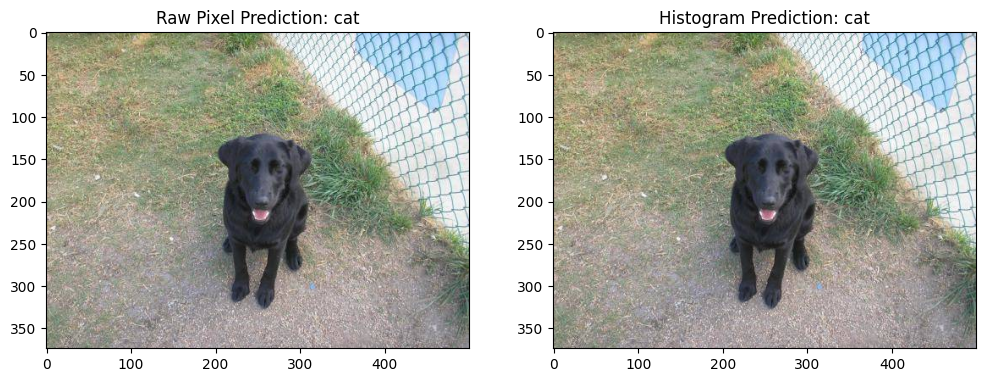

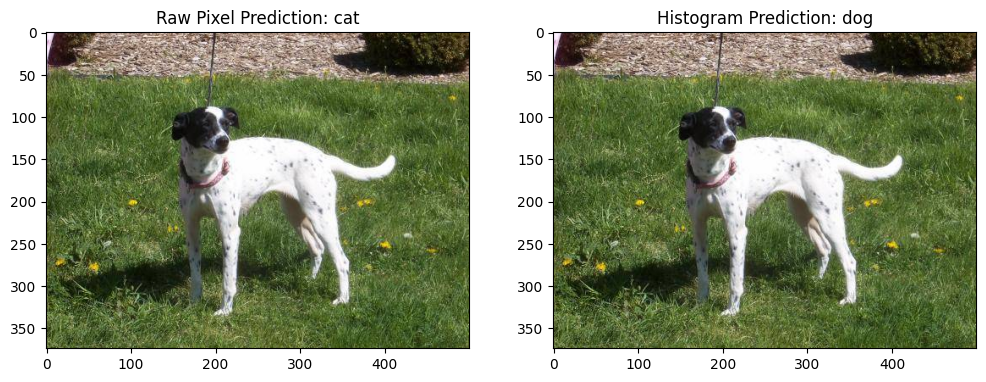

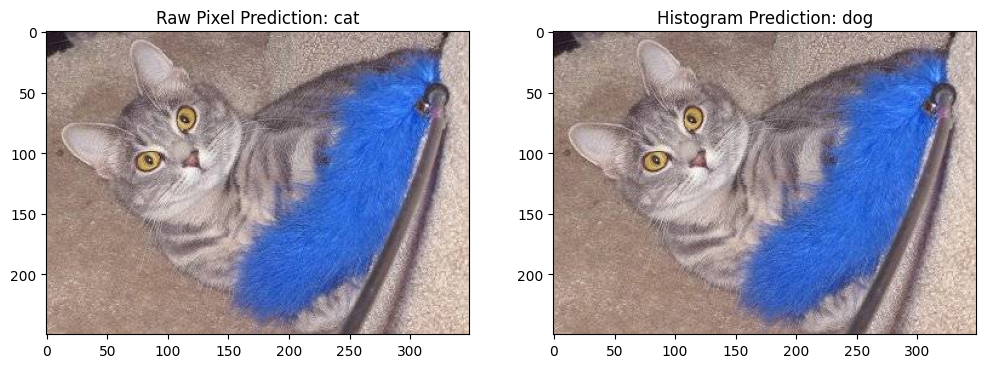

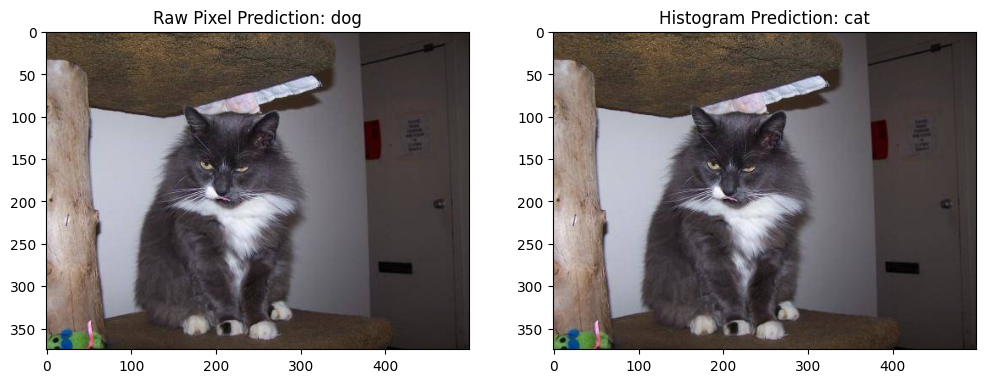

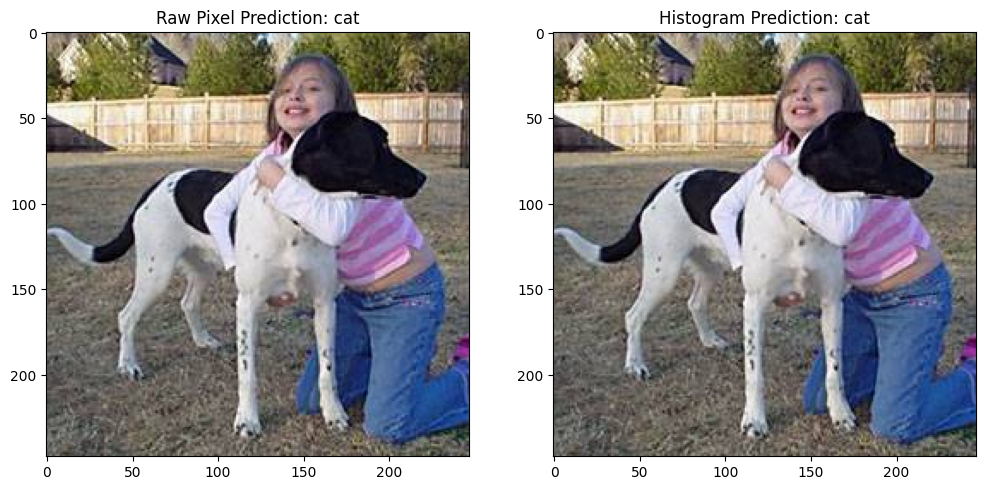

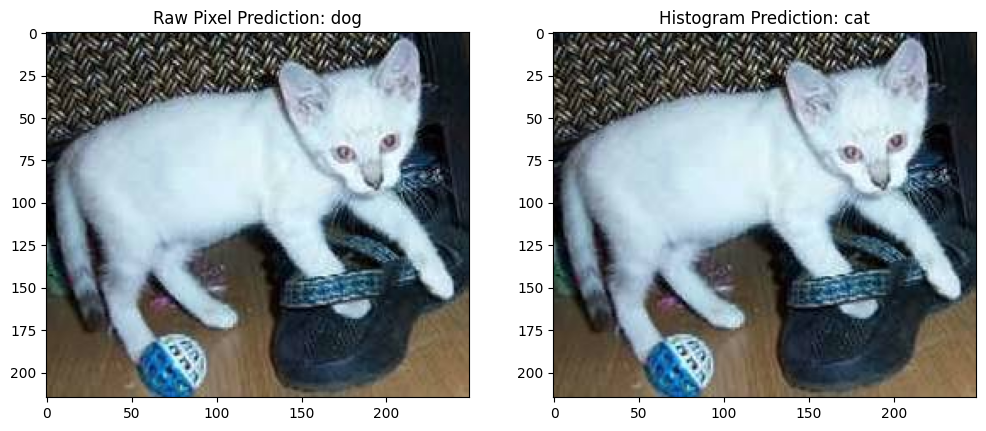

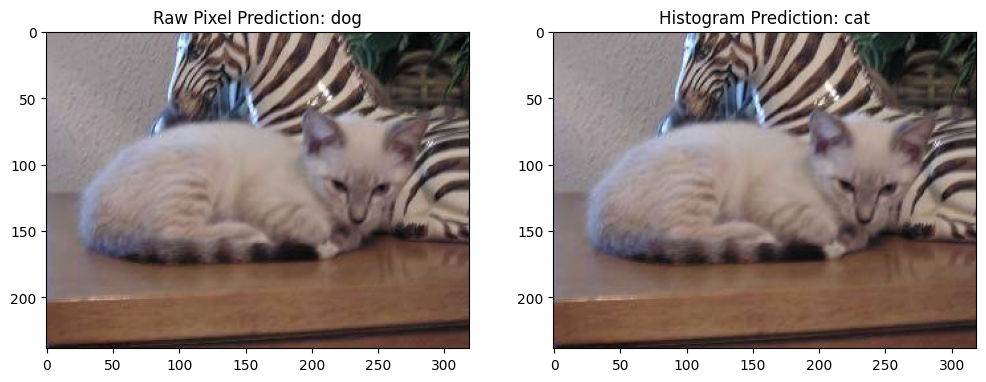

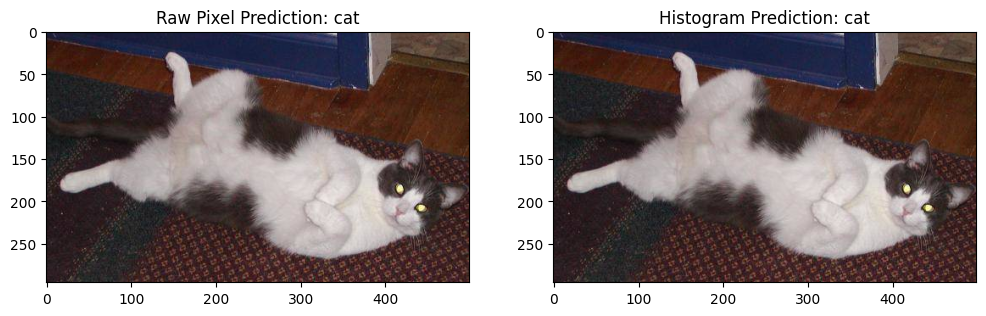

In [80]:
# Visualize the first 10 predictions
test_img_paths = list(paths.list_images("../data/dogs-vs-cats/test1"))
visualize_predictions(test_img_paths, 
    testPredictionsRI, testPredictionsFeat, num_images=10)